In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

def load_file(fname):
    with open(f"data/{fname}.jsonl", 'r') as file:
        json_list = list(file)

    result = []
    for json_str in json_list:
        result.append(json.loads(json_str))
    return result


# Users

In [7]:
users = load_file("users")

premium_counter, non_premium_counter = 0, 0
genres = {}
for user in users:
    if user["premium_user"] == True:
        premium_counter += 1
    if user["premium_user"] == False:
        non_premium_counter += 1
    try:
        for genre in user["favourite_genres"]:
            if genre not in genres:
                genres[f"{genre}"] = 1
            else:
                genres[f"{genre}"] += 1
    except:
        pass

print(f"Number of users: {len(users)}")
print(f"Premium users: {premium_counter}, non premium users: {non_premium_counter}, not defined: {len(users) - premium_counter - non_premium_counter}")
print(f"Number of genres: {len(genres)}", genres)


Number of users: 500
Premium users: 112, non premium users: 388, not defined: 0
Number of genres: 50 {'dance pop': 26, 'latin': 24, 'hard rock': 30, 'reggaeton': 36, 'latin arena pop': 39, 'modern rock': 32, 'rap': 38, 'art rock': 26, 'rock': 30, 'mexican pop': 31, 'contemporary country': 26, 'psychedelic rock': 34, 'adult standards': 33, 'permanent wave': 28, 'ranchera': 39, 'canadian pop': 40, 'pop': 37, 'folk rock': 30, 'regional mexican': 31, 'latin pop': 31, 'electropop': 25, 'country': 43, 'hip hop': 37, 'k-pop boy group': 31, 'norteno': 29, 'pop rap': 30, 'corrido': 37, 'country road': 33, 'mellow gold': 18, 'alternative rock': 35, 'nu metal': 27, 'post-teen pop': 35, 'tropical': 29, 'pop urbaine': 21, 'album rock': 24, 'french hip hop': 31, 'trap latino': 30, 'pop rock': 31, 'rock en espanol': 31, 'k-pop': 25, 'pop punk': 23, 'r&b': 29, 'classic rock': 20, 'urban contemporary': 24, 'neo mellow': 31, 'uk pop': 23, 'metal': 28, 'post-grunge': 21, 'alternative metal': 27, 'soft ro

# Artists

In [8]:
artists = load_file("artists")

anomaly_counter = 0
genres = {}
for artist in artists:
    try:
        for genre in artist["genres"]:
            if genre not in genres:
                genres[genre] = 1
            else:
                genres[genre] += 1
    except:
        pass
    if artist["id"] == -1:
        anomaly_counter += 1

print(f"Number of artists: {len(artists)}")
print(f"Number of anomalies in artist data: {anomaly_counter} (id = -1)")
print(f"Number of genres: {len(genres)}")

Number of artists: 1667
Number of anomalies in artist data: 0 (id = -1)
Number of genres: 846


# Tracks

Number of track records: 22412
Number of anomalies in track data: 0 (id = null; name=null; id_artist=null; popularity=null)


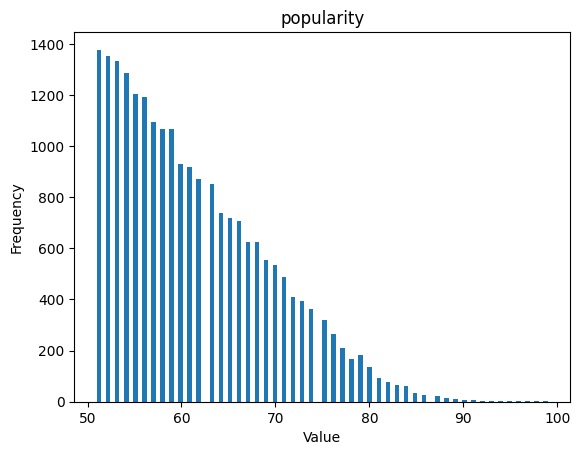

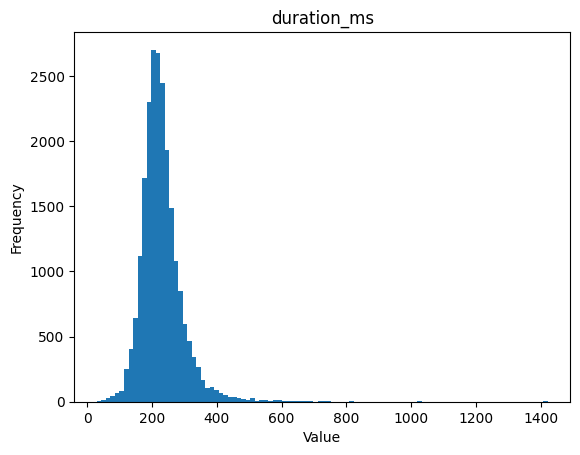

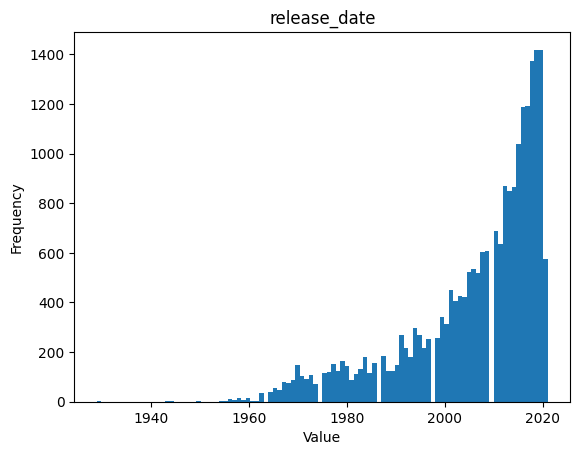

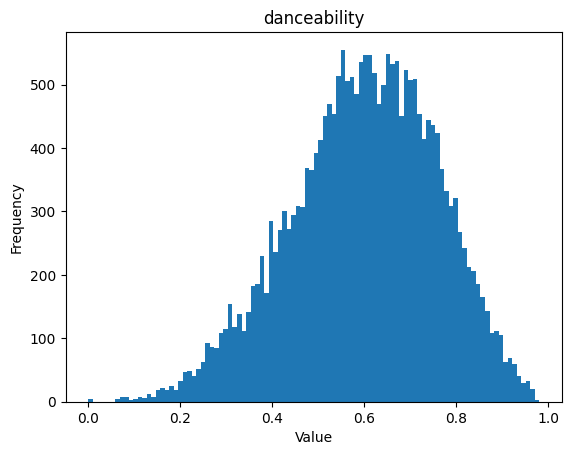

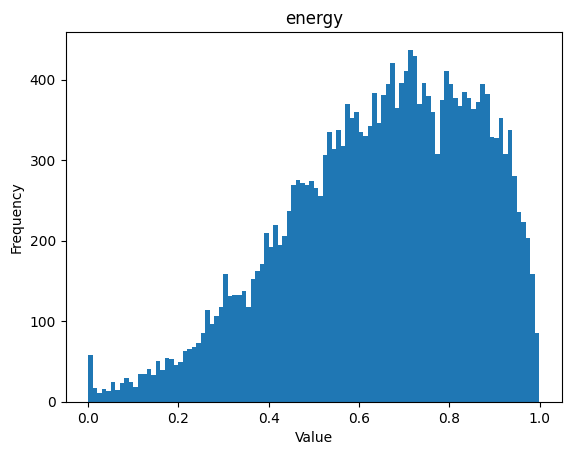

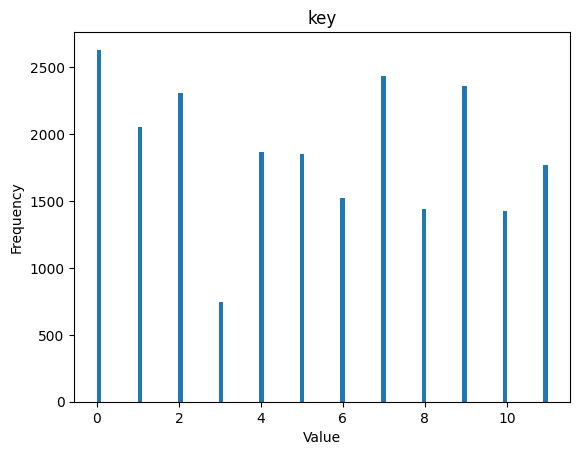

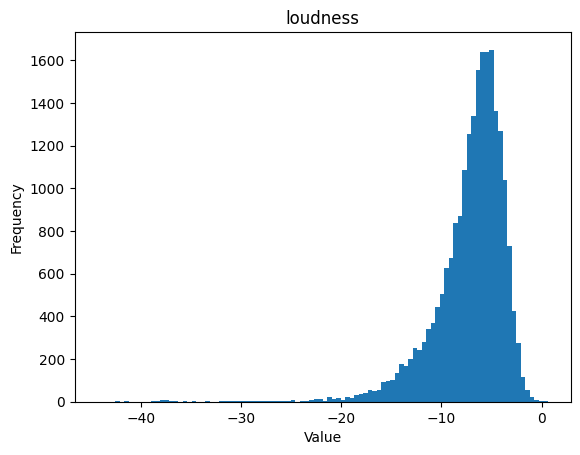

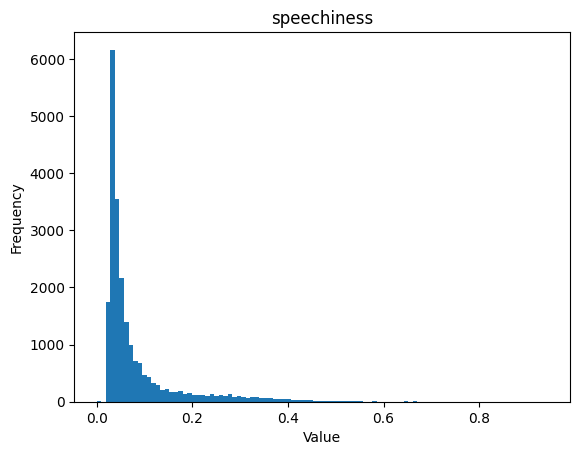

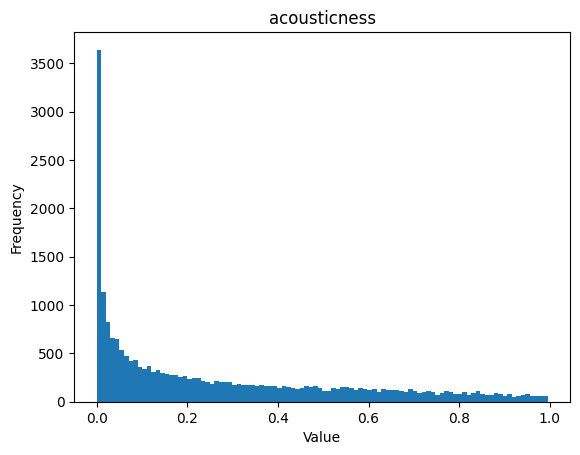

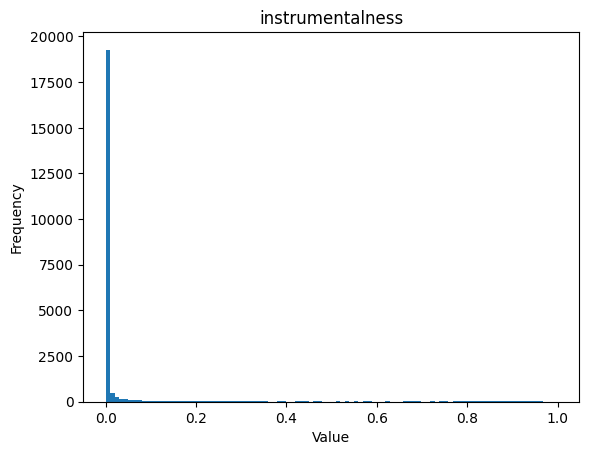

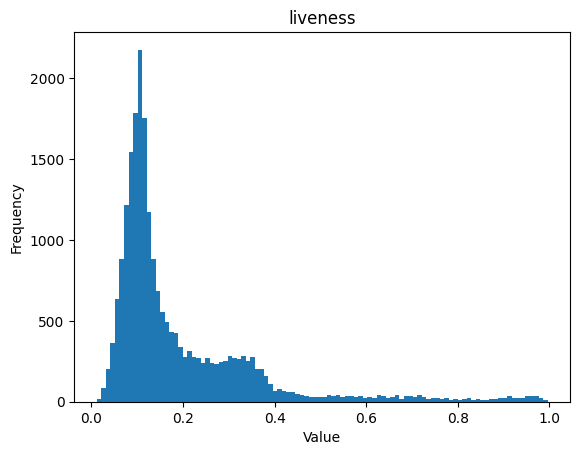

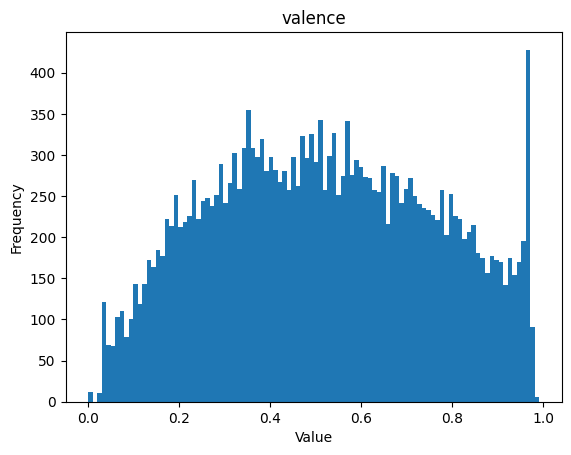

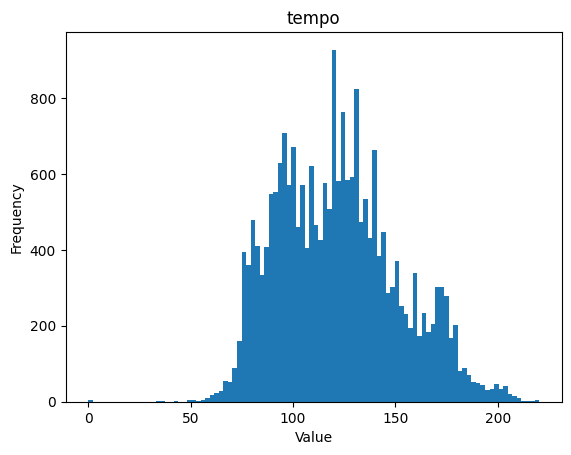

In [2]:
tracks = load_file("tracks")

def histogram(data, title):
    plt.clf()
    counts, bins = np.histogram(data, bins=100)
    plt.hist(bins[:-1], bins, weights=counts)

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

atributes = ['popularity', 'duration_ms', 'release_date', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
atr_values = {}
anomaly_counter = 0
for atr in atributes:
    atr_values[atr] = []

for track in tracks:
    for atr in atributes:
        atr_values[atr].append(track[atr])
    if track['popularity'] is None or track['id'] is None or track['name'] is None or track['id_artist'] is None:
        anomaly_counter += 1

year_list = []
for date in atr_values['release_date']:
    if date is not None:
        year_list.append(int(date[:4]))
atr_values['release_date'] = year_list
atr_values['duration_ms'] = [lenght / 1000 for lenght in atr_values['duration_ms'] if lenght <= 1500000]
atr_values['popularity'] = [pop if pop is not None else 0 for pop in atr_values['popularity']]

print(f"Number of track records: {len(tracks)}")
print(f"Number of anomalies in track data: {anomaly_counter} (id = null; name=null; id_artist=null; popularity=null)")
for atr in atributes:
    histogram(atr_values[atr], atr)

# Sessions

In [10]:
sessions = load_file("sessions")

event_types = {}
anomaly_counter = 0
for session in sessions:
    event = session["event_type"]

    if event not in event_types:
        event_types[event] = 1
    else:
        event_types[event] += 1

    if (session["user_id"] is None or (session["track_id"] is None and event != "advertisment") or event is None):
        anomaly_counter += 1
    

print(f"Number of session records: {len(sessions)}")
print(event_types)
print(f"Number of anomalies in session data: {anomaly_counter} \n(user_id = null; track_id = null; event_type = null)")

Number of session records: 285114
{'play': 158166, 'advertisment': 37998, 'like': 39401, 'skip': 49549}
Number of anomalies in session data: 0 
(user_id = null; track_id = null; event_type = null)
